In [1]:
# Practical 5: Player Position Analysis in Cricket

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Clean theme for plots
sns.set(style="whitegrid")


In [4]:
# ---------------------------------------------------------------
# Step 1: Create a large synthetic cricket dataset (400+ innings)
# ---------------------------------------------------------------

np.random.seed(99)

players = [f"Player_{i}" for i in range(1, 51)]  # 50 players
positions = ["Batsman", "Bowler", "All-Rounder", "Wicket-Keeper"]
teams = ["MI", "CSK", "RCB", "KKR", "RR", "SRH"]
matches = 420

data = {
    "Player": np.random.choice(players, matches),
    "Team": np.random.choice(teams, matches),
    "Position": np.random.choice(positions, matches, p=[0.4, 0.35, 0.2, 0.05]),
    "Runs": np.random.randint(0, 130, matches),
    "Balls_Faced": np.random.randint(5, 100, matches),
    "Wickets": np.random.randint(0, 5, matches),
    "Balls_Bowled": np.random.randint(0, 60, matches),
    "Dismissed": np.random.choice([0,1], matches, p=[0.25, 0.75])
}


df = pd.DataFrame(data)

In [5]:
df.shape

(420, 8)

In [6]:
df.head()

,Player,Team,Position,Runs,Balls_Faced,Wickets,Balls_Bowled,Dismissed
0,Player_2,RCB,Batsman,96,53,2,7,0
1,Player_36,KKR,Wicket-Keeper,31,51,4,55,1
2,Player_41,KKR,Bowler,28,30,2,41,1
3,Player_10,MI,All-Rounder,55,62,0,31,1
4,Player_41,RCB,Batsman,116,33,1,19,1


In [7]:
# ---------------------------------------------------------------
# Step 2: Compute role-based metrics
# ---------------------------------------------------------------

df_grouped = df.groupby(["Player", "Position"]).agg({
    "Runs": "sum",
    "Balls_Faced": "sum",
    "Wickets": "sum",
    "Balls_Bowled": "sum",
    "Dismissed": "sum"
}).reset_index()

# Replace zero dismissals
df_grouped["Dismissed"] = df_grouped["Dismissed"].replace(0, np.nan)

# Batting metrics
df_grouped["Batting_Avg"] = df_grouped["Runs"] / df_grouped["Dismissed"]
df_grouped["Strike_Rate"] = (df_grouped["Runs"] / df_grouped["Balls_Faced"]) * 100

# Bowling metrics
df_grouped["Bowling_Avg"] = df_grouped["Runs"] / df_grouped["Wickets"].replace(0, np.nan)
df_grouped["Overs"] = df_grouped["Balls_Bowled"] / 6
df_grouped["Economy_Rate"] = df_grouped["Runs"] / df_grouped["Overs"].replace(0, np.nan)

print("✅ Sample Data:")
print(df_grouped.head())


✅ Sample Data:
      Player       Position  Runs  Balls_Faced  Wickets  Balls_Bowled  \
0   Player_1    All-Rounder   119           10        4            13   
1   Player_1        Batsman   256          219        9           119   
2   Player_1         Bowler   238          189       12            42   
3   Player_1  Wicket-Keeper    14           93        0            18   
4  Player_10    All-Rounder   182          139        1            31   

   Dismissed  Batting_Avg  Strike_Rate  Bowling_Avg      Overs  Economy_Rate  
0        1.0   119.000000  1190.000000    29.750000   2.166667     54.923077  
1        3.0    85.333333   116.894977    28.444444  19.833333     12.907563  
2        4.0    59.500000   125.925926    19.833333   7.000000     34.000000  
3        1.0    14.000000    15.053763          NaN   3.000000      4.666667  
4        2.0    91.000000   130.935252   182.000000   5.166667     35.225806  


In [8]:
# ---------------------------------------------------------------
# Step 3: Compare players within each position
# ---------------------------------------------------------------

# Top 5 Batsmen by Batting Avg
top_batsmen = df_grouped[df_grouped["Position"]=="Batsman"].sort_values(
    by="Batting_Avg", ascending=False).head(5)

print("\n🏅 Top 5 Batsmen (Batting Avg):")
print(top_batsmen[["Player","Batting_Avg","Strike_Rate"]])

# Top 5 Bowlers by Wickets
top_bowlers = df_grouped[df_grouped["Position"]=="Bowler"].sort_values(
    by="Wickets", ascending=False).head(5)

print("\n🔥 Top 5 Bowlers (Wickets):")
print(top_bowlers[["Player","Wickets","Economy_Rate"]])

# Top 5 All-Rounders by runs + wickets
df_grouped["AllRounder_Index"] = df_grouped["Runs"] + (20 * df_grouped["Wickets"])
top_allrounders = df_grouped[df_grouped["Position"]=="All-Rounder"].sort_values(
    by="AllRounder_Index", ascending=False).head(5)

print("\n💪 Top 5 All-Rounders:")
print(top_allrounders[["Player","Runs","Wickets","AllRounder_Index"]])


🏅 Top 5 Batsmen (Batting Avg):
       Player  Batting_Avg  Strike_Rate
87  Player_34        222.0   132.142857
32  Player_18        207.0   130.188679
75  Player_30        189.5   114.848485
51  Player_23        167.0   172.164948
99  Player_38        149.0   286.538462

🔥 Top 5 Bowlers (Wickets):
        Player  Wickets  Economy_Rate
114  Player_41       15      9.769231
49   Player_22       14      4.718182
55   Player_24       14     16.848837
66   Player_28       13     13.702703
2     Player_1       12     34.000000

💪 Top 5 All-Rounders:
        Player  Runs  Wickets  AllRounder_Index
148   Player_7   390        7               530
80   Player_32   297       10               497
86   Player_34   214        9               394
140   Player_5   199        7               339
11   Player_12   212        6               332


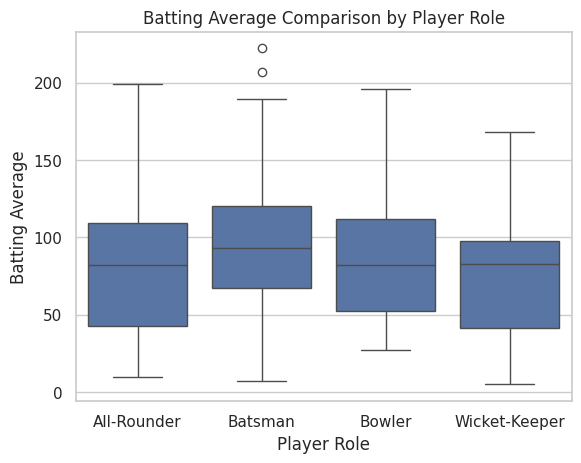

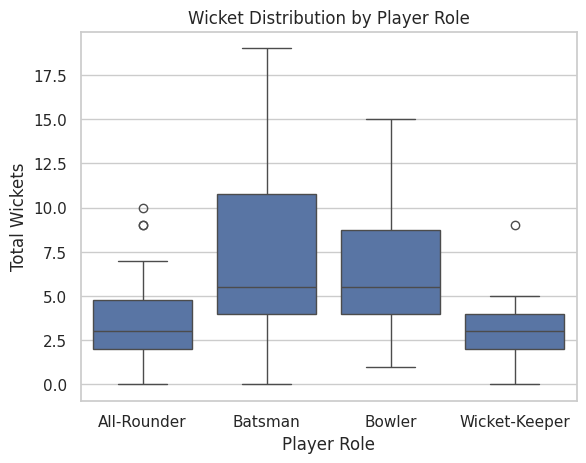

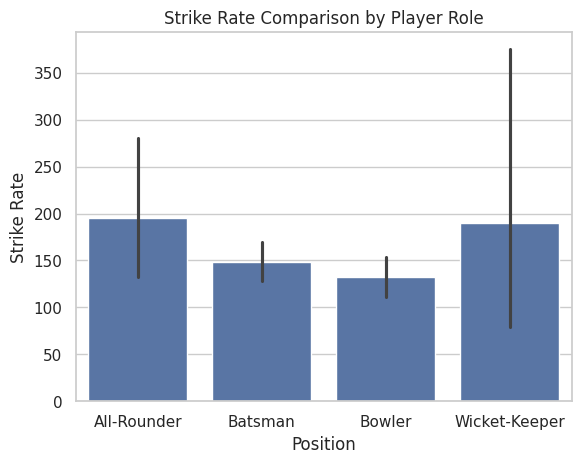

In [9]:
# ---------------------------------------------------------------
# Step 4: Visualization
# ---------------------------------------------------------------

# Batting Avg by Position
plt.figure()
sns.boxplot(x="Position", y="Batting_Avg", data=df_grouped)
plt.title("Batting Average Comparison by Player Role")
plt.xlabel("Player Role")
plt.ylabel("Batting Average")
plt.show()

# Wickets by Role
plt.figure()
sns.boxplot(x="Position", y="Wickets", data=df_grouped)
plt.title("Wicket Distribution by Player Role")
plt.xlabel("Player Role")
plt.ylabel("Total Wickets")
plt.show()

# Strike Rate comparison (All Roles)
plt.figure()
sns.barplot(x="Position", y="Strike_Rate", data=df_grouped)
plt.title("Strike Rate Comparison by Player Role")
plt.xlabel("Position")
plt.ylabel("Strike Rate")
plt.show()